### Time Series Scratchpad

In [1]:
# general imports
import pandas as pd
import requests
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# set figure size
plt.rcParams["figure.figsize"] = (8,6)

# specify decimal places to display
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [2]:
from vega_datasets import data
df = data.sf_temps()
df.head()

,temp,date
0,47.80,2010-01-01 00:00:00
1,47.40,2010-01-01 01:00:00
2,46.90,2010-01-01 02:00:00
3,46.50,2010-01-01 03:00:00
4,46.00,2010-01-01 04:00:00


Use the above dataset for the exercises below:

1. Resample by the day and take the average temperature. Visualize the average temperature over time.

In [3]:
type(df.date)

pandas.core.series.Series

In [4]:
df['date'] = pd.to_datetime(df['date'], format = '%Y-%m-%d %I-%p')

In [5]:
# Set date to index
df = df.set_index('date').sort_index()

In [6]:
type(df.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [7]:
# add a new columns called 'day' which is the 'weekday'
df['day'] = df.index.day_name()
df.head()

,temp,day
date,,
2010-01-01 00:00:00,47.80,Friday
2010-01-01 01:00:00,47.40,Friday
2010-01-01 02:00:00,46.90,Friday
2010-01-01 03:00:00,46.50,Friday
2010-01-01 04:00:00,46.00,Friday


In [8]:
df.groupby('day').mean()

,temp
day,
Friday,56.80
Monday,56.95
Saturday,56.95
Sunday,56.96
Thursday,56.94
Tuesday,56.95
Wednesday,56.94


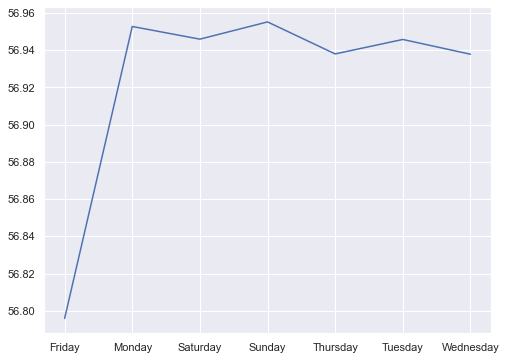

In [9]:
plt.plot(df.groupby('day').mean())

2. Write the code necessary to visualize the minimum temperature over time.

<AxesSubplot:xlabel='date'>

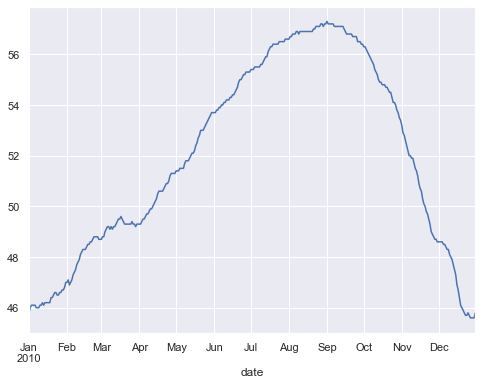

In [21]:
df.resample('D').min().temp.plot()

3. Write the code necessary to visualize the maximum temperature over time.

<AxesSubplot:xlabel='date'>

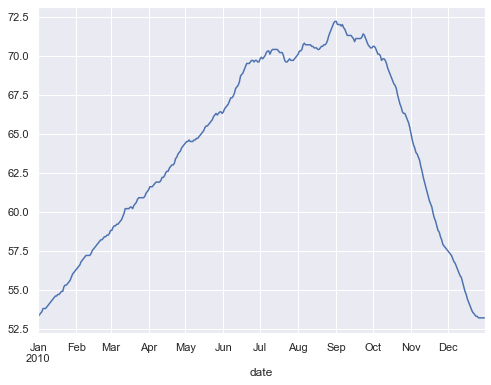

In [39]:
df.resample('D').max().temp.plot()

4. Which month is the coldest, on average?

In [40]:
df['month'] = df.index.month_name()

In [42]:
df.groupby('month').mean().nsmallest(n=1, columns='temp')

,temp
month,
January,49.98


5. Which month has the highest average temperature?

In [43]:
df.groupby('month').mean().nlargest(n=1, columns='temp')

,temp
month,
September,62.49


6. Resample by the day and calculate the min and max temp for the day (Hint: .agg(['min', 'max'])). Use this resampled dataframe to calculate the change in temperature for the day. Which month has the highest daily temperature variability?

7. Bonus: Visualize the daily min, average, and max temperature over time on a single line plot, i.e. the min, average, and maximum temperature should be 3 seperate lines.

In [ ]:
from vega_datasets import data
data.seattle_weather()

Use the dataset to answer the following questions:

1. Which year and month combination has the highest amount of precipitation?

2. Visualize the amount of monthly precipitation over time.

3. Visualize the amount of wind over time. Choose a time interval you think is appropriate.

4. Which year-month combination is the windiest?

5. What's the sunniest year? (Hint: which day has the highest number of days where weather == sun?)

6. In which month does it rain the most?

7. Which month has the most number of days with a non-zero amount of precipitation?

In [ ]:
data.flights_20k()

1. Convert any negative delays to 0.

2. Which hour of the day has the highest average delay?

3. Does the day of the week make a difference in the delay amount?

4. Does the month make a difference in the delay amount?

### Bonus

In [ ]:
from vega_datasets import data
data.iowa_electricity()

1. For each row, calculate the percentage of the year's total that energy source provided.

2. Lineplot of generation over time, color by source

3. Display the data as table where years are columns, and energy source is rows (Hint: df.pivot_table)

4. Make a line plot that shows the amount of energy generated over time. Each source should be a separate line?

5. Is the total generation increasing over time?

5a. How would you control for increasing consumption over time when considering how much energy is coming from each source?

5b. express each number as a % of the year's total

### Mas Bonus

1. Use the sf_temps dataset

2. Create 4 categories for temperature, cold, cool, warm, hot (hint: use pd.cut or pd.qcut for this)

3. How does the occurances of these 4 categories change month over month? i.e. how many days have each distinction? Visualize this and give the visual appropriate colors for each category.

4. Create pretty labels for time plots

5. Visualize the number of days of each month that fall into each bin by year (e.g. x=month, y=n_days, hue=temp_bin) or st similar

### Mas Mas Bonus

1. Explore the birdstrikes dataset.

In [ ]:
df = data.birdstrikes()